<div class="alert alert-success"><br>
<span style=" font-size: 4em; "><center>EM for GMMs</center></span>
<br>

<span style=" font-size: 3em; "><center>Henri Hours</center></span>
<br>
</div>

<div class="alert alert-success"><span style=" font-size: 2em; "><center> Introduction to Probabilistic Graphical Models<br> <br>_Practical Session 2_</center></span></div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question-1" data-toc-modified-id="Question-1-1">Question 1</a></span><ul class="toc-item"><li><span><a href="#log-$|\Sigma|$" data-toc-modified-id="log-$|\Sigma|$-1.1">log $|\Sigma|$</a></span></li><li><span><a href="#$\Sigma^{-1}$" data-toc-modified-id="$\Sigma^{-1}$-1.2">$\Sigma^{-1}$</a></span></li><li><span><a href="#$l_i(x)$" data-toc-modified-id="$l_i(x)$-1.3">$l_i(x)$</a></span></li><li><span><a href="#$\gamma_i(x)$" data-toc-modified-id="$\gamma_i(x)$-1.4">$\gamma_i(x)$</a></span></li></ul></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-2">Question 2</a></span><ul class="toc-item"><li><span><a href="#$\mathcal{L}_t(\theta)$-(log_likelihood)" data-toc-modified-id="$\mathcal{L}_t(\theta)$-(log_likelihood)-2.1">$\mathcal{L}_t(\theta)$ (log_likelihood)</a></span></li><li><span><a href="#$\mathcal{M}$-step" data-toc-modified-id="$\mathcal{M}$-step-2.2">$\mathcal{M}$-step</a></span><ul class="toc-item"><li><span><a href="#$\mu_k^{(t+1)}$" data-toc-modified-id="$\mu_k^{(t+1)}$-2.2.1">$\mu_k^{(t+1)}$</a></span></li><li><span><a href="#$\Sigma_k^{(t+1)}$" data-toc-modified-id="$\Sigma_k^{(t+1)}$-2.2.2">$\Sigma_k^{(t+1)}$</a></span></li><li><span><a href="#$\pi_k^{(t+1)}$" data-toc-modified-id="$\pi_k^{(t+1)}$-2.2.3">$\pi_k^{(t+1)}$</a></span></li></ul></li></ul></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-3">Question 3</a></span><ul class="toc-item"><li><span><a href="#3.1.-Generate-and-visualize-the-dataset" data-toc-modified-id="3.1.-Generate-and-visualize-the-dataset-3.1">3.1. Generate and visualize the dataset</a></span></li><li><span><a href="#3.2.-EM-algorithm-for-GMMs" data-toc-modified-id="3.2.-EM-algorithm-for-GMMs-3.2">3.2. EM algorithm for GMMs</a></span><ul class="toc-item"><li><span><a href="#3.2.-a)-Visualize-the-progress-of-EM-algorithm" data-toc-modified-id="3.2.-a)-Visualize-the-progress-of-EM-algorithm-3.2.1">3.2. a) Visualize the progress of EM algorithm</a></span></li><li><span><a href="#3.2.-b)-Plot-the-log_likelihood" data-toc-modified-id="3.2.-b)-Plot-the-log_likelihood-3.2.2">3.2. b) Plot the log_likelihood</a></span></li><li><span><a href="#3.2.-c)-Influence-of-the-initial-parameters" data-toc-modified-id="3.2.-c)-Influence-of-the-initial-parameters-3.2.3">3.2. c) Influence of the initial parameters</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse 
from itertools import cycle, islice
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', 
          '#984ea3','#999999', '#e41a1c', '#dede00']
import itertools

# Question 1

<div class="alert alert-success">

In Gaussian Mixture Models, we often need to evaluate quantities that are defined as follows:
<br>

\begin{equation}
\gamma_i(x) = \frac{ \pi_i \mathcal{N}(x;\mu_i, \Sigma_i)}{\sum_{j=1}^K \pi_j \mathcal{N}(x ; \mu_j, \Sigma_j)}
\end{equation}
<br>
where $\pi_i \in [0,1]$ and $\mathcal{N}$ denotes the multivariate Gaussian distribution. A direct computation of these quantities might be problematic in practice since all the terms $\pi_i \mathcal{N}(x;\mu_i, \Sigma_i)$ might be very small, and we might end up with 0/0.   
<br>
Derive mathematically (don’t try to take the derivative!) and implement a function for numerically stable computation
of $\{\gamma_i\}_{i=1}^K$.  
<br>
Hint: first compute $l_i = \log \pi_i \mathcal{N}(x;\mu_i, \Sigma_i)$ in a numerically stable way (be careful when computing log det $\Sigma_i$). Then use a trick similar to the one we used for 'log sum exp'.
A</div>

According to the hint:

\begin{align} 
l_i(x) & = \log \left(\pi_i \mathcal{N}(x;\mu_i, \Sigma_i) \right)\\
& = \log \left( \pi_i \frac{1}{(2 \pi)^{K/2} |\Sigma_i|^{1/2}} \exp \left(-\frac{1}{2}(x-\mu_i)^T \Sigma_i^{-1}(x-\mu_i)\right)\right)\\
& = \log \pi_i - \frac{1}{2} \left( K \log (2 \pi) + \log |\Sigma_i| + (x-\mu_i)^T \Sigma_i^{-1}(x-\mu_i)\right)
\end{align}

We have to compute $\log |\Sigma|$ and $(x-\mu_i)^T \Sigma_i^{-1}(x-\mu_i)$

-----------------------------------
##  log $|\Sigma|$

$\hskip 2cm$ Using **Cholesky decomposition** to the inverse of the Hermitian positive-definite matrix $\Sigma$ :

$\hskip 2cm$ We want L such as $\Sigma = L L^T $ where $L$ is a lower triangular matrix
$$U =  \begin{bmatrix}
       L_{11} &  &  &  \\
       L_{21} & L_{22} &  &  \\
       \vdots &  & \ddots & \\
       L_{N1} & L_{N2} & \cdots & L_{NN}
       \end{bmatrix}$$

$\hskip 2cm$ $|\Sigma| = |L L^T|  = \prod_i L_{ii}^{2} $ 

$\hskip 2cm$ Therefore we have $\log |\Sigma| = \log \prod_i L_{ii}^{2} = \sum_i \log L_{ii}^{2} = 2\sum_i \log L_{ii}$ 


$\hskip 2cm$ To compute $L$:

\begin{align}
\Sigma = LL^t \implies \sigma_{ij} & = (LL^t)_{ij} \\
& = \sum_{k=1}^N L_{ik} U_{jk}\\
& = \sum_{k=1}^{\min(i, j)} L_{ik} L_{jk}, 1\leq i, j \leq N\\
& = \sum_{k=1}^{i} L_{ik} L_{jk}, 1\leq i \leq j \leq N
\end{align}

$\hskip 3cm$ Starting with $i=1$, we determine the first colon of $L$:
\begin{align}
\sigma_{11} = L_{11} L_{11} & \implies L_{11} = \sqrt{\sigma_{11}} \\
\sigma_{1j} = L_{11} L_{j1} & \implies L_{j1} = \frac{\sigma_{1j}}{L_{11}}, 2\leq j \leq N 
\end{align}

$\hskip 3cm$ Having caculated the $(N- i+ 1)$ last colons of $U$:
\begin{align}
\sigma_{ii} = L_{i1} L_{i1} + \dots +  L_{ii} L_{ii} & \implies L_{ii} = \sqrt{\sigma_{ii} - \sum_{k=1}^{i-1} L_{ik}^2} \\
\sigma_{ij} = L_{i1} L_{j1} + \dots + L_{ii} L_{ji} & \implies L_{ji} = \frac{\sigma_{ij} - \sum_{k=1}^{i-1} L_{ik}L_{jk}}{L_{ii}}, i+1 \leq j \leq N 
\end{align}

In [2]:
# apply the above recursive 
def cholesky_decomposition_sigma(sigma):
    '''
    this function compute the Cholesky decomposition of the SPD matrix sigma 
        sigma = L.L^T withh L lower triangular matrix
            sigma has to be symetric definite positive
    ---------------------------------------------------------------------------
    Input:
        sigma : a symetric definite positive matrix size NxN
    Output:
        L  : a lower trianglar matrix size NxN.
                such that L.L^T = sigma
    '''
    N = len(sigma)
    L = np.zeros((N, N))
    for i in range(N):
        L[i][i] = (sigma[i][i] - np.sum((L[i,:][:i]) **2)) ** (0.5)
        for j in range(i + 1, N):
            L[j][i] = (sigma[i][j] - np.sum(L[i,:][:j-1] * L[j,:][:j-1])) / L[i][i]
    return L

In [3]:
# check the function.example fm Wikipedia
sig = np.array(([1,1,1,1],[1,5,5,5],[1,5,14,14],[1,5,14,15]))
L = cholesky_decomposition_sigma(sig)
np.allclose(sig,L.dot(L.T))

True

## $\Sigma^{-1}$

$$\Sigma = LL^T \implies \Sigma^{-1} = (L^{-1})^T L^{-1} $$

In [4]:
# Function to compute the inverse of a lower triangular matrix
def inverse_lower_triangular_matrix(L):
    '''
    this function returns the inverse of a lower triangular matrix L
     algorithm from 
         G. W. Stewart, Matrix Algorithms: Volume 1: Basic Decompositions, 1998
         algorithm 2.3
    '''
    inverse_L = L.copy()
    N = len(L)
    for j in range(N-1):
        inverse_L[j,j] = 1.0 / inverse_L[j,j]
        for i in range(j + 1, N):
            inverse_L[i,j] = - np.dot(inverse_L[i, j:i], inverse_L[j:i, j]) / inverse_L[i,i]
    inverse_L[N-1, N-1] = 1.0 / inverse_L[N-1, N-1]
    return inverse_L

In [5]:
# test
np.allclose(inverse_lower_triangular_matrix(L).dot(L), np.eye(4))

True

##  $l_i(x)$

$\hskip 2cm$  Applying  $\log |\Sigma| = 2\sum_i \log L_{ii}$ and $\Sigma^{-1} = (L^{-1})^T L^{-1}$ 

\begin{align} l_i(x) & = \log \pi_i - \frac{1}{2} \left( K \log (2 \pi) + \log |\Sigma_i| +  (x-\mu_i)^T \Sigma_i^{-1}(x-\mu_i)\right)\\
& =  \log \pi_i - \frac{1}{2} \left( K \log (2 \pi) + 2\sum_j \log L_{jj}+  (x-\mu_i)^T (L^{-1})^T L^{-1}(x-\mu_i)\right)\\
& =  \log \pi_i - \frac{1}{2} \left( K \log (2 \pi) + 2\sum_j \log L_{jj}+  (L^{-1}(x-\mu_i))^T (L^{-1}(x-\mu_i))\right)\\
& =  \log \pi_i - \frac{1}{2} \left( K \log (2 \pi) + 2\sum_j \log L_{jj}+  ||L^{-1}(x-\mu_i))||^2\right)
\end{align}

In [15]:
# constant log(2π)
LOG_2_PI = np.log(2 * np.pi)


def l_i(i, x, pi, sigma, mu):
    """
    This function compute l_i 
       = log π_i - 1/2 * ( K log 2π + log |Σ_i| + (x-μ_i).T Σ_i^{-1}(x-μ_i))
    """
    K = len(pi)
    L = cholesky_decomposition_sigma(sigma[i])
    log_det_sigma_i =  2 * np.sum(np.log(L.diagonal()))
    inverse_L = inverse_lower_triangular_matrix(L)
    third_term = np.sum(np.square(inverse_L.dot(x - mu[i])), axis=-1)
    return (np.log(pi[i]) - (K * LOG_2_PI + log_det_sigma_i + third_term) / 2.)

In [16]:
x = np.array([7,2])

In [17]:
pi = [0.3, 0.2, 0.5]
mu = np.array([[0, 0], [1, 2], [2, 0]])
sigma = np.array([[[1., -0.25], [-0.25, 0.5]],
         [[0.5, 0.25], [0.25, 0.5]],
         [[0.5, -0.25], [-0.25, 1]]])
l_i(0, x, pi, sigma, mu)

-44.11887768877629

We now have $l_i$, we have to compute $\gamma_i$:

## $\gamma_i(x)$

\begin{align}
\gamma_i(x) & = \frac{ \pi_i \mathcal{N}(x;\mu_i, \Sigma_i)}{\sum_{j=1}^K \pi_j \mathcal{N}(x ; \mu_j, \Sigma_j)}\\
 & = \frac{\exp(l_i(x))}{\sum_{i=1}^K \exp(l_i(x))}\\
& =  \frac{\exp(l_i(x)-b)\exp(b)}{\sum_{i=1}^K \exp(l_i(x)-b) \exp(b)} & \text {with } b = \max_i l_i(x)\text{  [exp_normalize trick]}\\
& =  \frac{\exp(l_i(x)-b)}{\sum_{i=1}^K \exp(l_i(x)-b)}
\end{align}

In [7]:
# using the exp norm trick:
def gamma(xn, K , pi, sigma, mu):
    """
    This function compute gamma
    """
    ll = [l_i(i, xn, pi, sigma, mu) for i in range(K)]
    limax = np.max(ll)
    exp_diff = np.exp(ll-limax)
    exp_diff_sum = np.sum(exp_diff)
    return  exp_diff / exp_diff_sum

# Question 2

<div class="alert alert-success">

Let us consider a Gaussian Mixture Model (GMM), given as follows:
<br>

\begin{equation}
p(x_n) = \sum_{i=1}^K \pi_i \mathcal{N}(x_n ; \mu_i, \Sigma_i)
\end{equation}

where $\{x_n\}_{n=1}^N $ is a set of observed data points. 

<br>Derive the M-Step of the Expectation-Maximization algorithm for this model, to find $\pi_{1:K}^{(t+1)}, \mu_{1:K}^{(t+1)}, \Sigma_{1:K}^{(t+1)}$, where $t$ denote the iteration number.
</div>

## $\mathcal{L}_t(\theta)$ (log_likelihood)

$\hskip 2cm$  From the $\mathbb{E}$-step we have:

\begin{equation*}
\mathcal{L}_t(\theta) = \mathbb{E}\left[\log p(x_n, z_{1:N}|\theta) \right]_{p(z_{1:N}|x_{1:N}, \theta^{(t)})}
\end{equation*}


\begin{align*}
\log p(x_{1:N}, z_{1:N}|\theta) &\overset{iid}{=} \log \prod_{n=1}^N p(x_n, z_n|\theta)\\
 &\overset{\times rule}{=} \log \prod_{n=1}^N p(x_n|  z_n,\theta) p(z_n|\theta) \\
& = \sum_{n=1}^N \log  p(x_n|  z_n,\theta) + \sum_{n=1}^N \log p(z_n|\theta)\\
& = \sum_{n=1}^N \log p(x_n|z_n,\mu_{1:K}, \Sigma_{1:K}) + \sum_{n=1}^N \log  p(z_n|\pi_{1:K}) \\
& [x_n|z_n \text{ don't depend of } \pi_k \text{ and } z_n \text{ don't depend of }\mu_k, \Sigma_k]\\
& = \sum_{n=1}^N \log \prod_{k=1}^K  \mathcal{N}(x_n;\mu_k, \Sigma_k)^{\mathbb{1}(z_n=k)} + \sum_{n=1}^N \log \prod_{k=1}^K \pi_k^{\mathbb{1}(z_n=k)}\\
& = \sum_{n=1}^N \sum_{k=1}^K  \mathbb{1}(z_n=k) \log \mathcal{N}(x_n;\mu_k, \Sigma_k) + \sum_{n=1}^N \sum_{k=1}^K \mathbb{1}(z_n=k) \log \pi_k \quad [\log(a^b) = b \log a]
\end{align*}


$\hskip 2cm$ Expectation taken wrt $z_{1:N}$:

\begin{align*}
\mathcal{L}_t(\theta) &= \mathbb{E}\left[\log p(x_n, z_{1:N}|\theta) \right]_{p(z_{1:N}|x_{1:N}, \theta^{(t)})}\\
 &= \sum_{n=1}^N \sum_{k=1}^K  \mathbb{E}\left[\mathbb{1}(z_n=k) \right]_{p(z_{1:N}|x_{1:N}, \theta^{(t)})} \log \mathcal{N}(x_n;\mu_k, \Sigma_k) \\
& + \sum_{n=1}^N \sum_{k=1}^K \mathbb{E} \left[\mathbb{1}(z_n=k)\right]_{p(z_{1:N}|x_{1:N}, \theta^{(t)})} \log \pi_k
\end{align*}


\begin{align*}
\mathbb{E}\left[\mathbb{1}(z_n=k) \right]_{p(z_{1:N}|x_{1:N},\theta^{(t)} )} & = p(z_n=k|x_n, \theta^{(t)}) \\
& \overset{\text{Bayes rule}}{=}\frac{p(x_n=k|z_n, \theta^{(t)}) p(z_n=k|\theta^{(t)})}{p(x_n| \theta^{(t)})}\\
&=  \frac{\mathcal{N}(x_n;\mu_k^{(t)}, \sigma_k^{(t)}) \pi_k^{(t)}}{\sum_{k=1}^K p(x_n, z_n = k | \theta^{(t)})}\\
&=  \frac{\mathcal{N}(x_n;\mu_k^{(t)}, \sigma_k^{(t)}) \pi_k^{(t)}}{\sum_{k=1}^K \pi_k \mathcal{N}(x_n; \mu_k, \Sigma_k)}\\
&=: \gamma_k^{(t)} (x_n)
\end{align*}

$\hskip 2cm$ Endly we have:
\begin{align*}
\mathcal{L}_t(\theta) &=  \sum_{n=1}^N \sum_{k=1}^K  \gamma_k^{(t)} (x_n) \log \mathcal{N}(x_n;\mu_k, \Sigma_k) + \sum_{n=1}^N \sum_{k=1}^K  \gamma_k^{(t)} (x_n) \log \pi_k\\
& = \sum_{n=1}^N \sum_{k=1}^K \gamma_k^{(t)} (x_n) \log \left( \pi_k \mathcal{N}(x_n;\mu_k, \Sigma_k) \right)\\
& =  \sum_{n=1}^N \sum_{k=1}^K \gamma_k^{(t)} (x_n) l_k(x_n)\\
& = \sum_{n=1}^N \sum_{k=1}^K \gamma_k^{(t)} (x_n) \left( \log \pi_k - \frac{1}{2} \left( K \log (2 \pi) + \log |\Sigma_k| +  (x-\mu_k)^T (\Sigma_k)^{-1}(x-\mu_k)\right)\right)
\end{align*}

With $\sum_k \pi_k=1$

## $\mathcal{M}$-step 

\begin{equation*}
\theta^{(t+1)} = \arg \max_\theta \mathcal{L}_t(\theta) 
\end{equation*}


We will get derivatives from the lower bound for each of the three parameters.

### $\mu_k^{(t+1)}$

\begin{align}
\frac{\partial \mathcal{L}_t(\theta) }{\partial \mu_k} & \propto \frac{\partial}{\partial \mu_k} \sum_{n=1}^N \gamma_k^{(t)} (x_n) (x_n-\mu_k)^T (\Sigma_k)^{-1}(x_n-\mu_k)\\
& \propto \sum_{n=1}^N \gamma_k^{(t)} (\Sigma_k)^{-1}(x_n-\mu_k)
\end{align}

\begin{align}
\frac{\partial \mathcal{L}_t(\theta) }{\partial \mu_k} = 0 & \Leftrightarrow \sum_{n=1}^N \gamma_k^{(t)}(x_n) (\Sigma_k)^{-1}(x_n-\mu_k) = 0\\
& \Leftrightarrow  \sum_{n=1}^N \gamma_k^{(t)}(x_n) (\Sigma_k)^{-1} x_n =  \sum_{n=1}^N \gamma_k^{(t)} (\Sigma_k)^{-1}\mu_k  \\
& \Leftrightarrow  \mu_k = \frac{\sum_{n=1}^N \gamma_k^{(t)}(x_n). x_n}{\sum_{n=1}^N \gamma_k^{(t)}(x_n)}
\end{align}

$$\fbox{ $  \mu_k^{(t+1)} = \frac{\sum_{n=1}^N \gamma_k^{(t)}(x_n). x_n}{\sum_{n=1}^N \gamma_k^{(t)}(x_n)}  $ } $$

### $\Sigma_k^{(t+1)}$

\begin{align}
\frac{\partial \mathcal{L}_t(\theta) }{\partial \Sigma_k} & \propto \frac{\partial } {\partial \Sigma_k}\sum_{n=1}^N \gamma_k^{(t)} (x_n) \left( - \log |\Sigma_k| -  (x-\mu_k)^T (\Sigma_k)^{-1}(x-\mu_k)\right)
\end{align}

$\hskip 2cm$ Using ($\Sigma$ symetric positive-definite):
$$\frac{\partial log|\Sigma|}{\partial \Sigma} = \frac{1}{|\Sigma|}\frac{\partial |\Sigma|}{\partial \Sigma} =  \frac{1}{|\Sigma|}|\Sigma| (\Sigma^{-1})^T = \Sigma^{-1}$$

$\hskip 2cm$ and $$\frac{\partial X^T \Sigma^{-1} X}{\partial \Sigma}=  -  \Sigma^{-1} X X^T  \Sigma^{-1}$$

\begin{align}
\frac{\partial \mathcal{L}_t(\theta) }{\partial \Sigma_k} = 0  & \Leftrightarrow \sum_{n=1}^N \gamma_k^{(t)} (x_n) \left( - (\Sigma_k)^{-1} + (\Sigma_k)^{-1} (x-\mu_k) (x-\mu_k)^T (\Sigma_k)^{-1} \right) = 0\\
\end{align}

$\hskip 2cm$ Multiplying left an right by $\Sigma_k$:

\begin{align}
\frac{\partial \mathcal{L}_t(\theta) }{\partial \Sigma_k} = 0  & \Leftrightarrow \sum_{n=1}^N \gamma_k^{(t)} (x_n) \left( - (\Sigma_k) + (x-\mu_k) (x-\mu_k)^T \right) = 0\\
& \Leftrightarrow \sum_{n=1}^N \gamma_k^{(t)} (x_n) \Sigma_k = \sum_{n=1}^N \gamma_k^{(t)} (x_n) \left((x-\mu_k) (x-\mu_k)^T \right)\\
&\Leftrightarrow \Sigma_k = \frac{\sum_{n=1}^N \gamma_k^{(t) } (x_n)(x-\mu_k) (x-\mu_k)^T}{\sum_{n=1}^N \gamma_k^{(t)} (x_n)} 
\end{align}

$$\fbox{ $ \Sigma_k^{(t+1)} = \frac{\sum_{n=1}^N \gamma_k^{(t) } (x_n)(x-\mu_k^{(t+1)}) (x-\mu_k^{(t+1)})^T}{\sum_{n=1}^N \gamma_k^{(t)} (x_n)} $}$$
$\hskip 2cm$ using the updated parameter $\mu_k^{(t+1)}$

### $\pi_k^{(t+1)}$

$\hskip 2cm$ With $\sum_{k=1}^K  \pi_k=1$:

\begin{align}
\frac{\partial (\mathcal{L}_t(\theta) + \lambda \sum_{i=1}^k \pi_k )}{\partial \pi_k} & \propto \frac{\partial } {\partial \pi_k} (\sum_{n=1}^N \gamma_k^{(t)} (x_n) \log \pi_k + \lambda \pi_k)\\
\end{align}

\begin{align}
\frac{\partial (\mathcal{L}_t(\theta) + \lambda \sum_{i=1}^k \pi_k )}{\partial \pi_k} = 0 & \Leftrightarrow \frac{\sum_{n=1}^N \gamma_k^{(t)} (x_n)}{\pi_k} + \lambda =0\\
& \Leftrightarrow \pi_k = - \frac{\sum_{n=1}^N \gamma_k^{(t)} (x_n)}{\lambda} \\
\end{align}


\begin{align}
\sum_{k=1}^K  \pi_k=1 & \Leftrightarrow \sum_{k=1}^K  - \frac{\sum_{n=1}^N \gamma_k^{(t)} (x_n)}{\lambda}=1\\
& \Leftrightarrow \lambda = -\sum_{k=1}^K \sum_{n=1}^N \gamma_k^{(t)} (x_n)\\
& \Leftrightarrow \lambda = -\sum_{k=1}^K \sum_{n=1}^N p(z_n = k|x_n)\\
& \Leftrightarrow \lambda = - \sum_{n=1}^N \sum_{k=1}^K p(z_n = k|x_n)\\
& \Leftrightarrow \lambda = - \sum_{n=1}^N 1\\
& \Leftrightarrow \lambda = - N\\
\end{align}

$\hskip 2cm$ Remplacing $\lambda$ by $-N$:
\begin{align}
\frac{\partial (\mathcal{L}_t(\theta) + \lambda \sum_{i=1}^k \pi_k )}{\partial \pi_k} = 0 & \Leftrightarrow  \pi_k = \frac{1}{N}\sum_{n=1}^N \gamma_k^{(t)} (x_n)\\
\end{align}

$$\fbox{ $ \pi_k^{(t+1)} = \frac{1}{N}\sum_{n=1}^N \gamma_k^{(t)} (x_n) $}$$

# Question 3

<div class="alert alert-success">

Consider the model given in Equation 1. 
<br>
Set $K = 3$, $\pi_1 = 0.3$, $\pi_2 = 0.2$, $\pi3 = 0.5$, $\mu_1 = [0; 0]$, $\mu_2 = [1; 2]$, $\mu_3 = [2; 0]$,
$\Sigma_1 = [1.00, −0.25; −0.25, 0.50]$, $\Sigma_2 = [0.50, 0.25; 0.25, 0.50]$, $\Sigma_3 = [0.50, −0.25; −0.25, 1]$.


</div>

In [8]:
pi = np.array([0.3, 0.2, 0.5])
mu = np.array([[0,0], [1,2], [2,0]])
sigma = np.array([[[1.00, -0.25],[-0.25,0.50]], [[0.50, 0.25],[0.25,0.50]], [[0.50, -0.25],[-0.25,1.]]])
N = 1000

## 3.1. Generate and visualize the dataset
<div class="alert alert-info">
Generate a dataset $\{x_n\}_{n=1}^N$ by using the model definition (set $N = 1000$). <br>Visualize the dataset.</div>

\begin{equation}
p(x_n) = \sum_{i=1}^K \pi_i \mathcal{N}(x_n ; \mu_i, \Sigma_i)
\end{equation}


In [27]:
def generate_gmm_dataset(N, pi, mu, sigma):
    """
    this function initialise a GMM dataset {x_n} size N where 
        p(x_n) = \sum_{i=1}^K \pi_i \mathcal{N}(x_n ; \mu_i, \Sigma_i)
    """ 
    
    K = len(pi)
    X_i = []
    y_i = []
    compt = np.zeros(K)
    for n in range(N):
        # select the gaussian
        i = np.random.choice(range(K), p=pi)
        compt[i] += 1

    X = np.vstack(np.array([np.random.multivariate_normal(mu[i], sigma[i], size=int(compt[i])) for i in range(K)]))
    y = np.hstack(np.array([i * np.ones(int(compt[i])) for i in range(K)]))
    # all samples are sorted by mixture, we need random:
    indices = np.random.permutation(N)
    Xp = [X[i] for i in indices]
    yp = [y[i] for i in indices]
    return np.array(Xp), np.array(yp)

In [28]:
X, y = generate_gmm_dataset(N, pi, mu, sigma)

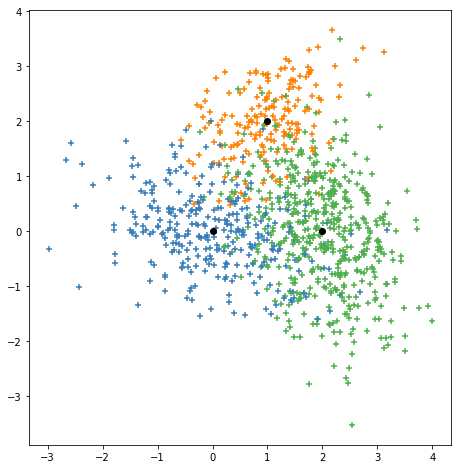

In [29]:
ycolors = [colors[int(i)] for _, i in enumerate(y)]
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0],X[:,1], marker='+', c = ycolors)
ax.scatter(mu[:, 0], mu[:, 1], marker = 'o', c='black')
ax.set_aspect('equal')
plt.show()

Black point are the means of the gaussians.

## 3.2. EM algorithm for GMMs
<div class="alert alert-success"> Implement the EM algorithm for GMMs (be careful about numerical stability!).</div>

criteria to stop algorithm : if $||\mathcal{L}_t(\theta) - \mathcal{L}_{t-1}(\theta)|| < 0.1$ or nb_iteration = 100

In [30]:
class GMM(object):
    '''
    This class contain all methods and functions to initialize an GMM 
        an run the EM algorithm on an dataset
    ==========================================================================
    functions:
    ---------
    random_initialize() : random initialize the parameters mu, sigma and pi
    set_initial_parameters(mu, sigma, pi): allows to initialize the EM 
            algorithm with specific parameters
    fit(X) : run the EM algorithm 
    e_step() : update gamma
    m_step() : update the parameters : mu, sigma and pi
    log_likelihood() :  update the loglikehood 
                        = \sum_{n=1}^N \sum_{k=1}^K \gamma_k^{(t)} (x_n) l_k(x_n)
    lk(point, k) : returns l_i 
           = log π_k - 1/2 * ( K log 2π + log |Σ_k| + (x-μ_k).T Σ_k^{-1}(x-μ_k))
    get_accuracy(y) : calculate the rate of good prediction 
                        with y the true labels

    
    '''
    def __init__(self, K):
        '''
        init function with number of mixtures
        '''
        # number of mixtures
        self.K = K
        self.LOG2PI = np.log(2 * np.pi)
        
    def random_initialize(self):
        '''
        initialize random parameters : pi, mu, sigma
        '''
        # initialize mu (random means)
        self.mu = np.random.random((self.K,self.d))
        
        # initialize sigma (random definite positive matrix)
        self.sigma = []
        for _ in range(self.K):
            A = np.tril(np.random.rand(self.d,self.d))
            self.sigma.append(A.dot(A.T))
        self.sigma = np.array(self.sigma)
        # or initialize sigma with identity       
        # self.sigma = np.array([np.identity(self.d) for i in range(self.K)]) / self.K
        
        # initialize pi with random and normalize
        pis = [np.random.rand() for k in range(self.K)]
        self.pi = pis / np.sum(pis)
    
    def set_initial_parameters(self, mu, sigma, pi):
        '''
        this function allows setting initial parameters mu, sigma and pi
        '''
        self.mu = mu
        self.sigma = sigma
        self.pi = pi

        
    def fit(self, X, stop_step=0.1, rand_initialize=True, keep_parameters=False, max_iter=100, verbose=True):
        """
        Runs the EM algorithm on the dataset X. 
            Condition to stop : if the difference beetween two following loglikelihood < stop_step
                                or nb_iteration = max_iter
            If keep_parameters, stores alls the steps of the EM algorithms (gamma, pi, mu, sigma)
            If verbose, print the number of step to achieve the condition to stop
        """
        # dimension
        self.N, self.d = X.shape
        self.X = X.copy()

        # initialize empty gamma 
        self.gamma = np.zeros((self.N, self.K))
        self.n_iter = 0

        # initialize the parameters
        if rand_initialize:
            self.random_initialize()

        self.keep_parameters = keep_parameters
        if self.keep_parameters:
            self.list_mu = [self.mu]
            self.list_sigma = [self.sigma]
            self.list_pi = [self.pi]
        self.list_log_likelihood =[self.log_likelihood()]

        self.n_iter = 0
        diff_log_likelihood = 1000
        
        while (diff_log_likelihood > stop_step and self.n_iter < max_iter):
            
            # perform e_step
            self.e_step()
            
            #perform m_step
            self.m_step()
            
            # update loglikehood
            self.list_log_likelihood.append(self.log_likelihood())
            #print("iteration {} Log likelihood = {}".format(self.n_iter + 1, self.log_likelihood()))
            if verbose:
                print('.', end='', flush=True)
            # update the stoping condition
            if self.n_iter > 1:
                diff_log_likelihood = self.list_log_likelihood[-1] - self.list_log_likelihood[-2:-1]
            
            self.n_iter += 1
        if verbose:
            print("\nDone in {} iterations !".format(self.n_iter))

    def e_step(self):
        '''
        Expectation step : just update gamma
        '''
        #udapte gamma using the exp norm trick in accordance with the question 1
        gamma_n=[]
        for n in range(self.N):
            xn = self.X[n]
            list_lk = [self.lk(xn, k) for k in range(self.K)]
            lkmax = np.max(list_lk)
            exp_diff = np.exp(list_lk - lkmax)
            gamma_n.append(exp_diff / np.sum(exp_diff))   
        self.gamma = np.array(gamma_n) 
              
    # using the above defined function (question 1):
    def lk(self, point, k):
        '''
        return lk(x_n) & = log π_k - 1/2 * ( K log 2π + log |Σ_k| + (x_n-μ_k).T Σ_k^{-1}(x-μ_k))
        '''
        #use cholesky_decomposition_sigma and inverse_lower_triangular_matrix defined in question 1
        L = cholesky_decomposition_sigma(self.sigma[k])
        log_det_sigma_k =  2 * np.sum(np.log(L.diagonal()))
        inverse_L = inverse_lower_triangular_matrix(L)
        third_term = np.sum(np.square(inverse_L.dot(point - self.mu[k])), axis=-1)
        
        return (np.log(self.pi[k]) - (self.K * self.LOG2PI + log_det_sigma_k + third_term) / 2.)    

    def log_likelihood(self):
        ll = 0
        for n in range(self.N):
            for k in range(self.K):
                ll += self.gamma[n,k] * self.lk(self.X[n,:],k)
        return ll

    
    def log_proba(self, samples):
        '''
        compute the log probabilities for each data point in x.
        Using log sum exp trick
        log sum_k pi_k N(x, mu_k, sigma_k) = log sum exp (l_i) 
        '''
        log_probabilities = []
        for x in samples:
            v = [self.lk(x,k) for k in range(self.K)]
            vmax = np.max(v)
            log_probabilities.append(vmax + np.log(np.sum(np.exp(v - vmax))))
        return log_probabilities
            
    def m_step(self):
        '''
        Maximisation step : update mu, sigma and pi according to the above formulas
        '''
        sum_gamma = [np.sum([self.gamma[n, k] for n in range(self.N)]) for k in range(self.K)]
        # update mu
        self.mu = np.array([np.sum([self.gamma[n, k] * self.X[n,:] for n in range(self.N)], axis=0) / sum_gamma[k] for k in range(self.K)])
        # update sigma
        self.sigma = np.array([np.sum([self.gamma[n,k] * np.outer(self.X[n,:] - self.mu[k,:], self.X[n,:] - self.mu[k,:]) for n in range(self.N)], axis=0)/sum_gamma[k] for k in range(self.K)])
        # update pi
        self.pi = np.array([sum_gamma[k]/self.N for k in range(self.K)])
        
        if self.keep_parameters:
            self.list_mu.append(self.mu)
            self.list_sigma.append(self.sigma)
            self.list_pi.append(self.pi)
    
    def get_accuracy(self, y):
        '''
        this function returns the accuracy (the max of proba)
            and permutation that allows to have good values
        '''
        permutations = list(itertools.permutations(range(self.K)))
        permutations_y = [np.array([permutation[int(y[n])] for n in range(self.N)]) for permutation in permutations]
        accuracy_list = [np.sum([np.argmax(self.gamma[n,:]) for n in range(self.N)]== permutations_y[i])/self.N for i in range(len(permutations))]
        
        return [np.max(accuracy_list), permutations[np.argmax(accuracy_list)]]
        

### 3.2. a) Visualize the progress of EM algorithm

<div class="alert alert-success">

Forget about the true parameters $\pi_{1:K}, \mu_{1:K}, \Sigma_{1:K}$ for now. 
<br>
By only considering the dataset $\{x_n\}_{n=1}^N$ that is generated in the previous step, run the EM algorithm after randomly initializing the parameter estimates $\pi_{1:K}^{(0)}, \mu_{1:K}^{(0)}, \Sigma_{1:K}^{(0)}$. 
<br> Visualize the intermediate results by plotting the contours of the estimated Gaussians.
</div>

In [31]:
# create the GMM with tha data X and number of cluster = 3
gmm = GMM(3)
X, y = generate_gmm_dataset(N, pi, mu, sigma)
# run the EM algorithm
gmm.fit(X, keep_parameters=True)
print("accuracy = ", gmm.get_accuracy(y)[0])

........................................................
Done in 56 iterations !
accuracy =  0.645


In [32]:
def plot_contour(ax, mu, sigma, lcolors):
    '''
    This function plot on the axe ax ellipses (mu, sigma)
    '''
    for k in range(3):
        v, w = np.linalg.eigh(sigma[k])
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v *= 8
        ellipse = Ellipse(mu[k], v[0], v[1], 180 + angle, lw=2, ec=lcolors[k], fc='none')
        ellipse.set_clip_box(ax.bbox)
        ellipse.set_alpha(0.5)
        ax.add_artist(ellipse)

        
def plot_iter(i, gmm2, mu, sigma, title=""):
    ycolors = [colors[int(i)] for _, i in enumerate(y)]
    fig, ax = plt.subplots(figsize=(8,8))
    ax.scatter(X[:,0],X[:,1], marker='+', c = ycolors)
    ax.scatter(mu[:, 0], mu[:, 1], marker = 'o', c='black', alpha=0.5)        
    ax.scatter(gmm2.list_mu[i][:, 0], gmm2.list_mu[i][:, 1], marker = 'o', c='r')
    plot_contour(ax, gmm2.list_mu[i], gmm2.list_sigma[i], colors)
    ax.set_title(title + "Iteration {}, loglikelihood = {}".format(i, np.round(gmm2.list_log_likelihood[i],2)), fontsize=16)
            # plot the true contours...
            #plot_contour(ax, mu, sigma, ['gray']*3)
    plt.axis('equal')
    plt.show()

In [33]:
def plot_progression_em(gmm2, mu, sigma, nb_plot=10):
    for step in range(0, gmm2.n_iter+1,(gmm2.n_iter+1)//nb_plot):
            plot_iter(step, gmm2, mu, sigma)

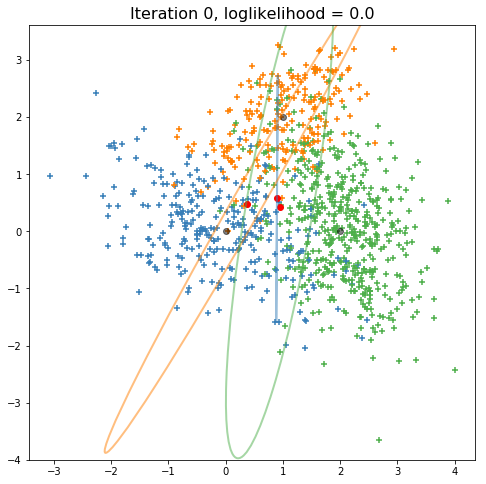

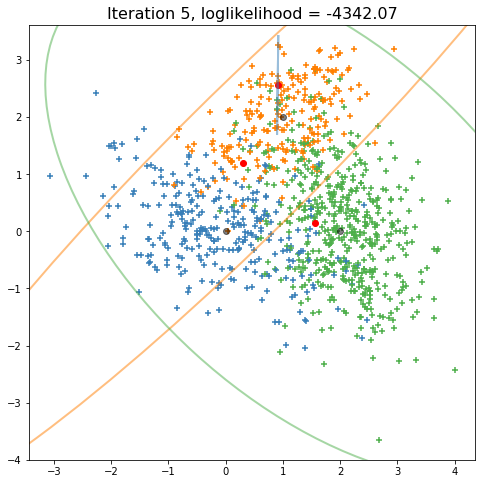

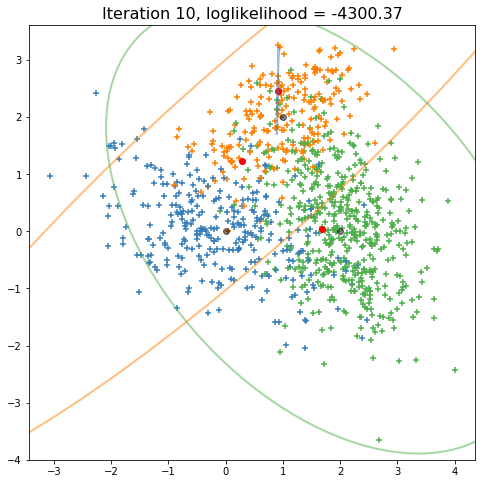

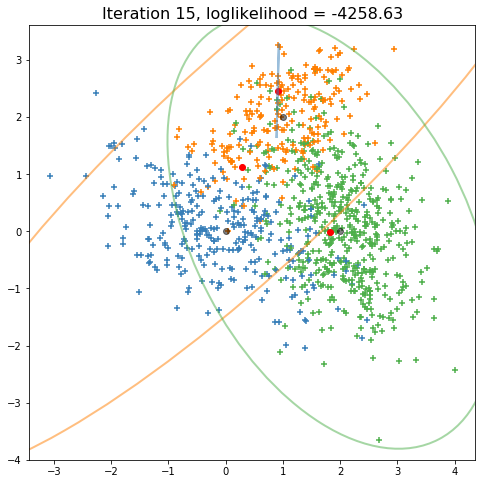

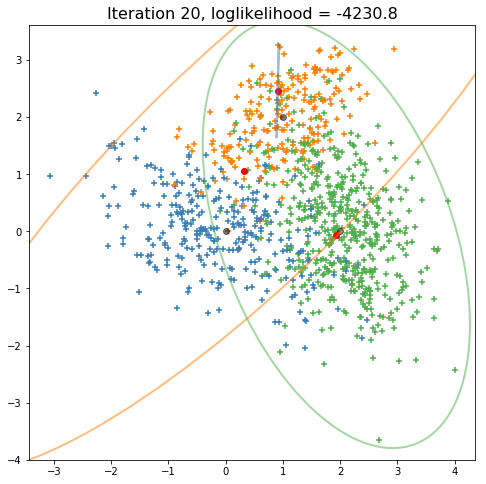

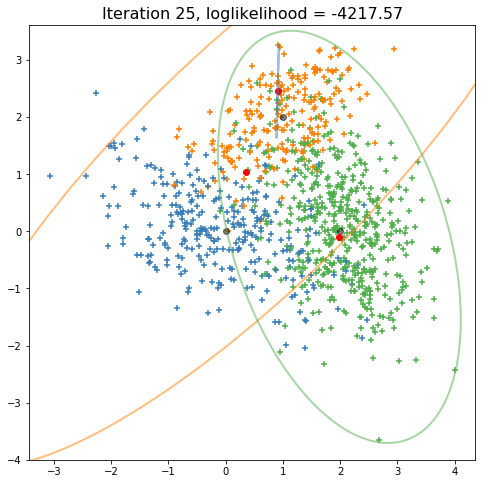

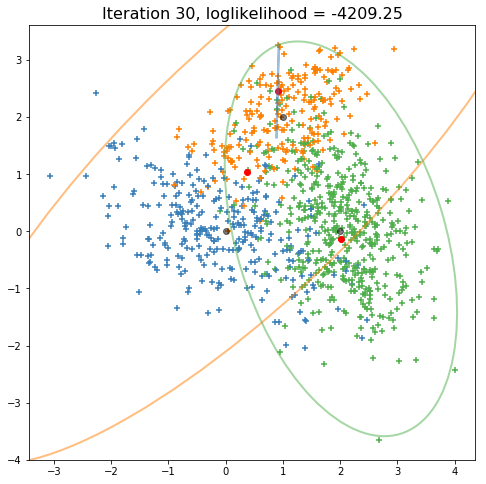

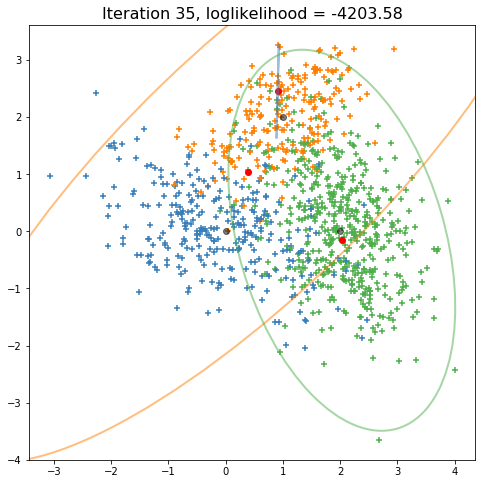

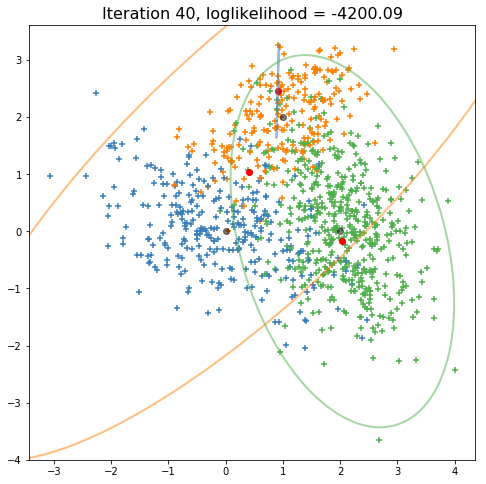

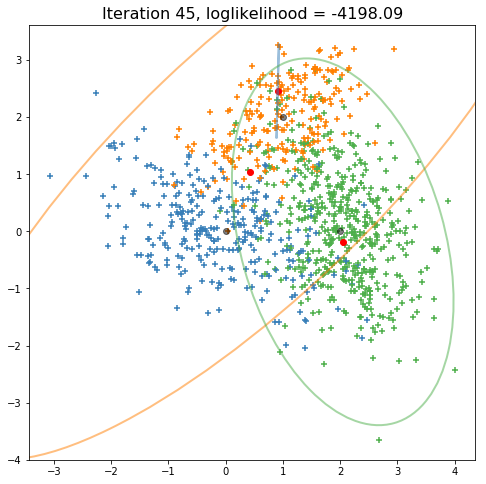

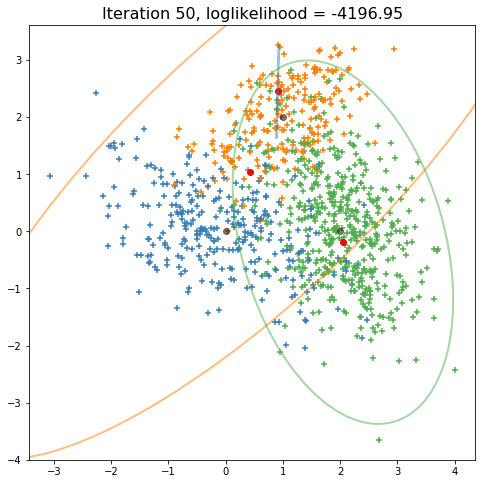

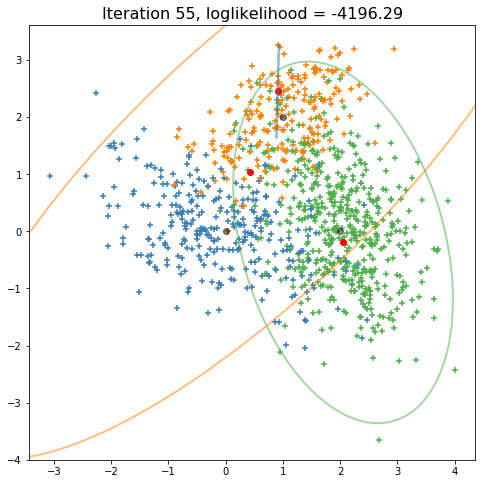

In [34]:
plot_progression_em(gmm, mu, sigma)

We can observe that the algorithm converges initialilly fast (orientation and size of the ellipses).
<br> 
The result is not very efficient. We will observe later that it depends of the initial parameters (here set randomly).

In [35]:
from matplotlib.colors import LogNorm

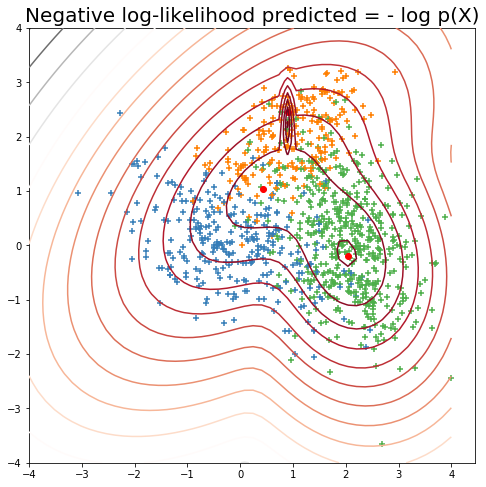

In [36]:
# another plot
fig, ax = plt.subplots(figsize=(8,8))
ycolors = [colors[int(i)] for _, i in enumerate(y)]
#ax.scatter(gmm.list_mu[step][:, 0], gmm.list_mu[step][:, 1], marker = 'o', c='r')
#plot_contour(ax, gmm.list_mu[step], gmm.list_sigma[step])
XX, YY = np.meshgrid(np.linspace(-4., 4.), np.linspace(-4., 4.))
XXX = np.array([XX.ravel(), YY.ravel()]).T
Z = -np.array(gmm.log_proba(XXX))
Z = Z.reshape(XX.shape)
CS = ax.contour(XX, YY, Z, 20, cmap='RdGy', levels=np.logspace(0, 2, 30), zorder=10)
ax.scatter(X[:,0], X[:,1], marker='+', c = ycolors, zorder=1)
ax.scatter(gmm.mu[:, 0], gmm.mu[:, 1], marker = 'o', c='red')
#norm=LogNorm(vmin=1.0, vmax=1000.0),
#CB = plt.colorbar(CS, shrink=0.8, extend='both')
ax.set_aspect('equal')
ax.set_title('Negative log-likelihood predicted = - log p(X)', fontsize=20)
plt.axis('tight')        
plt.show()

### 3.2. b) Plot the log_likelihood

<div class="alert alert-success">
While running the EM algorithm, compute the log-likelihood. <br>Plot the log-likelihood vs iterations (be
careful about numerical stability!).</div>

According to the result of question 2:
\begin{align*}
\mathcal{L}_t(\theta) &=   \mathbb{E}\left[\log p(x_n, z_{1:N}|\theta) \right]_{p(z_{1:N}|x_{1:N}, \theta^{(t)})}\\
& =  \sum_{n=1}^N \sum_{k=1}^K \gamma_k^{(t)} (x_n) l_k(x_n)\\
\end{align*}

In [37]:
def plot_evol_ll(gmm):
    fig, ax1 = plt.subplots(figsize=(13,6))
    color = 'tab:red'
    ax1.set_xlabel('iterations', fontsize=16)
    ax1.set_ylabel('log likelihood', color=color, fontsize=16)
    ax1.plot(range(1,gmm.n_iter+1), gmm.list_log_likelihood[1:], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()  
    plt.title('Evolution of log-likelihood', fontsize=20)
    plt.show()

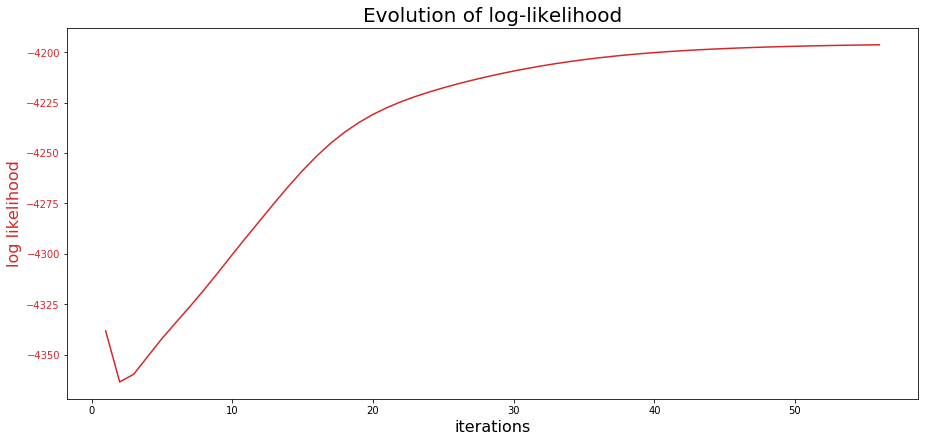

In [38]:
plot_evol_ll(gmm)

We can observe that the EM algorithm converges (firstly fast).

### 3.2. c) Influence of the initial parameters

<div class="alert alert-success">
Run the EM algorithm with different initializations for  $\pi_{1:K}^{(0)}, \mu_{1:K}^{(0)}, \Sigma_{1:K}^{(0)}$. <br>How sensitive is the algorithm
for different initial values?</div>

In [45]:
# test with all same parameters

#mu0 = np.zeros((3,2))
#sigma0 = np.array([np.identity(2) for i in range(3)]) / 3
pi0 = np.ones(3)/3


mu0 = np.array([[0,0], [1,2], [2,0]])
sigma0 = np.array([[[1.00, -0.25],[-0.25,0.50]], [[0.50, 0.25],[0.25,0.50]], [[0.50, -0.25],[-0.25,1.]]])

gmm = GMM(3)
gmm.set_initial_parameters(mu0, sigma0, pi0)
gmm.fit(X, keep_parameters=True, verbose=False)

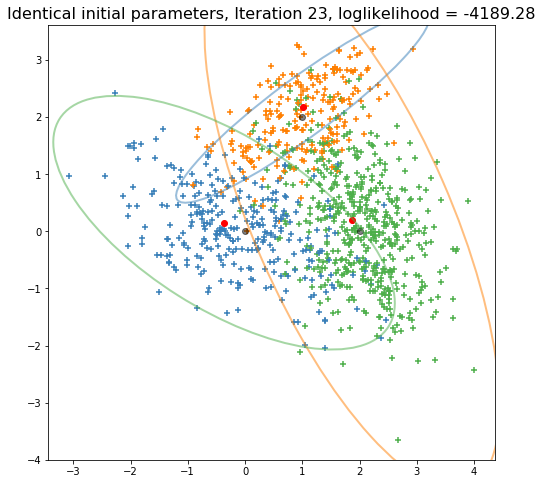

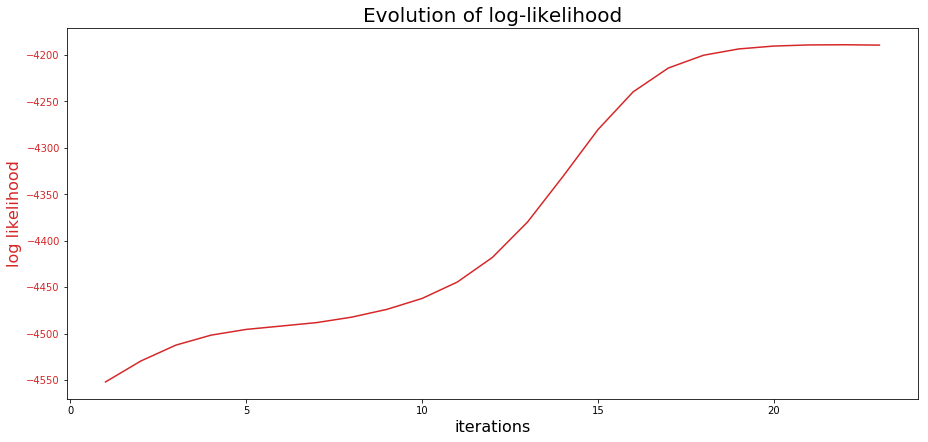

In [46]:
plot_iter(gmm.n_iter, gmm, mu, sigma, 'Identical initial parameters, ' )
plot_evol_ll(gmm)

In [47]:
gmm.get_accuracy(y)

[0.834, (2, 0, 1)]